## Week 7 Scratch Paper and Notes

In [1]:
## Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
## Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn import set_config
set_config(display='diagram')


In [53]:
## Data Filepaths
titanic_filepath ='/content/drive/MyDrive/Data/titanic.csv'
cancer_filepath = "/content/drive/MyDrive/Data/wisconsinBreastCancer.csv"
iris_filepath = '/content/drive/MyDrive/Data/Iris.csv'
wine_filepath = '/content/drive/MyDrive/Data/Wine_cultivars.csv'


,Class label,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavonid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# Classification

Classification is the other main type of supervised learning model. 
- Binary Classification: Model makes a prediction between two classes. (yes/no, cat/dog, etc)
- Multiclass Classification: Model predicting between more than two classes. 

Important to know if the classes in question are balanced (split evenly) or unbalanced. This plays into how the model evaluates the data.

## Decision Trees for Classification 
Similar to the regression trees covered in week 6. However, instead of looking at RSME, R2, or other metrics to make the choice the dataset looks at class to make the decision. 

### Python Example

In [4]:
iris_df = pd.read_csv(iris_filepath)
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Normalize = True outputs as a percentage!
iris_df['Species'].value_counts(normalize = True)

Iris-setosa        0.333333
Iris-versicolor    0.333333
Iris-virginica     0.333333
Name: Species, dtype: float64

In [6]:
# Convert string names to numeric
iris_dict = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
iris_df['Species'] = iris_df['Species'].replace(iris_dict)

In [7]:
# Assign target and feature matrix, Train Test Split.
y = iris_df['Species']
X = iris_df.drop(columns = 'Species')

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

In [8]:
dec_tree = DecisionTreeClassifier(random_state = 42)

In [9]:
# Check parameters
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [10]:
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [11]:
dec_tree.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [12]:
train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test, y_test)

print(f'train score: {train_score}')
print(f'test score: {test_score}')

train score: 1.0
test score: 1.0


## Type 1 and Type 2 Errors
Four result types for classification
- True Positive: Correct Result, Affirmative outcome
- True Negative: Correct Result, Negative outcome
- False Positive / Type 1 Error: Wrong Result, Claiming Affirmative outcome - Claims you are sick when you arent
- False Negative / Type 2 Error: Wrong Result, Claiming Negative outcome - claims you aren't sick when you are.

## Confusion Matrix
A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.
- Often displayed in a heatmap

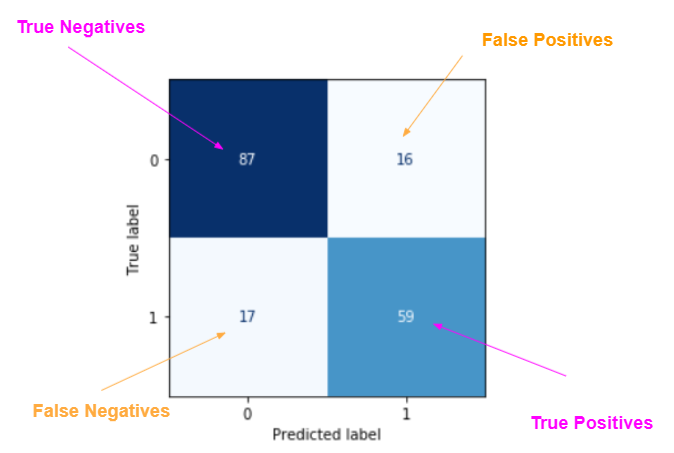

In [13]:
tit_df = pd.read_csv(titanic_filepath)
tit_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
# Choose columns to investigate
feature_cols = ['Pclass', 'Parch', 'Age', 'Sex']

# Prep Sex and Age column
tit_df['Sex'] = tit_df['Sex'].map({'male': 0,'female': 1})
tit_df = tit_df.loc[~tit_df['Age'].isnull(), :]

# Choose X and y
y = tit_df['Survived']
X = tit_df.loc[:, feature_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [15]:
# Instantiate Scaler, Model, and make pipe
scaler = StandardScaler()
logreg = LogisticRegression()
pipe = make_pipeline(scaler, logreg)

# Fit pipe
pipe.fit(X_train, y_train)

# Get predictions
preds = pipe.predict(X_test)

Accuracy is the most commonly used measure for success of a classification model. Accuracy in this context is defined as the percent correct (displayed in decimal form).

In [16]:
score = pipe.score(X_test, y_test)
print(f'Accuracy: {score:.3f}')

Accuracy: 0.771


In [17]:
y_test.values

array([0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0])

In [18]:
preds

array([0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0])

In [19]:
cm = confusion_matrix(y_test.values, preds)
cm

array([[86, 21],
       [20, 52]])

In [20]:
#flatten array
cm.ravel()

array([86, 21, 20, 52])

In [21]:
#unpack
tn, fp, fn, tp = cm.ravel()

print(f'True Positive: {tp}\nTrue Negative: {tn}\nFalse Positive: {fp}\nFalse Negative: {fn}')
print(f'\nAccuracy: {(tp+tn)/(tp+tn+fp+fn):.3f}')

True Positive: 52
True Negative: 86
False Positive: 21
False Negative: 20

Accuracy: 0.771


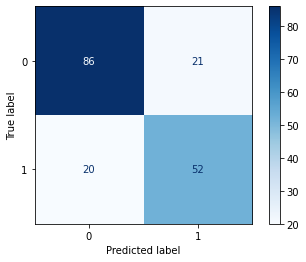

In [22]:
# Can also use ConfusionMatrixDisplay.from_predictions
# can use normalize = 'true' or normalize = 'pred'

ConfusionMatrixDisplay.from_estimator(pipe, X_test, y_test, cmap = 'Blues');

## Classification Metrics

### Accuracy

Accuracy: the is correct predictions our model made out of the total number of predictions.

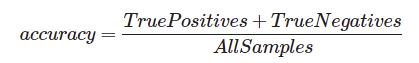

- Pros: Accuracy is easy to understand and gives a combined picture of both kinds of errors in one number.

- Cons: Accuracy can be deceiving when a dataset is unbalanced. It also does not give specific information about the kinds of errors that a model is making


In [23]:
#from sklearn.metrics
# accuracy = accuracy_score(y_test, y_pred)

### Recall
how many samples did our model label as positive out of all of the true positive samples?

Use when we want to reduce the number of false negatives 
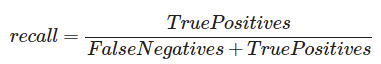

- Pros: A higher recall means a fewer false negative predictions, also known as type 2 errors. It's great for when classifying a positive as a negative is a costly mistake.

- Cons: Does not consider how many samples are falsely labeled as positive, or false positives. It does not penalize type 1 errors.

In [24]:
#from sklearn.metrics
# recall = recall_score(y_test, y_pred, average = 'marcro)

### Precision
What ratio of the samples that we predicted were in the positive class were actually in the positive class?

use when we want to reduce the number of false positives.

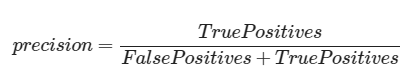

- Pros: A high precision means fewer type 1 errors, or fewer false positives. This is a good metric to maximize if a false positive prediction is a costly mistake.

- Cons: Precision does not penalize a model for false negatives. It does not count type 2 errors.

In [25]:
# from sklearn.metrics
# precision = precision_score(y_test, y_pred, average = 'macro')

## K Nearest Neighbor (KNN)

Measures the distance of a data point with other similar data points. Uses a number (k) and looks at that number of nearest neighbors to determine the class (majority) or point (regression - average of the values). MUST SCALE NUMBERS!

- Can be used for both classification and regression
- Low K. High variance, low bias.
- High K. Low variance, high bias.

### Python Example

In [26]:
# from sklearn.neighbors import KNeighborsClassifier

In [27]:
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [28]:
y = df['target']
X = df.drop(columns = 'target')

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [29]:
scaler = StandardScaler()
knn = KNeighborsClassifier(n_neighbors = 1)

In [30]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 1,
 'p': 2,
 'weights': 'uniform'}

In [31]:
knn_pipe = make_pipeline(scaler, knn)
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=1))])

In [32]:
pred = knn_pipe.predict(X_test)
pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [33]:
acc_score = knn_pipe.score(X_test, y_test)
acc_score

1.0

## Logistical Regression

Bends a regression line to best fit/match for binary targets using a sigmoid function. Result is the probability of a specific class.

- USED FOR CLASSIFICATION despite their confusing name...
- Used for binary classification (0 or 1). Will not work for multiclass

Advantages
- Able to interpret how the model makes predictions
- Model training and predictions are relatively fast
- It can perform well with a small number of observations.
- No tuning is usually needed for logistic regression unless you want to regularize your model.

Disadvantages
- Requires feature scaling
- Binary classification algorithm does not work for multiclass problems


### Python Example

In [34]:
# from sklearn.linear_model import LogisticRegression

In [35]:
can_df = pd.read_csv(cancer_filepath)
can_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [36]:
can_df['diagnosis'] = can_df['diagnosis'].replace({'B':0, 'M':1})


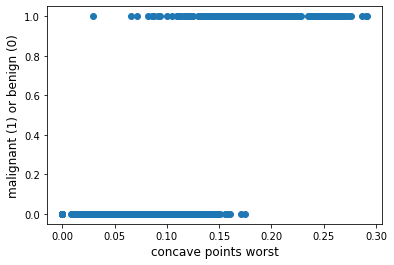

In [37]:
plt.scatter(can_df['concave points_worst'], can_df['diagnosis'])
plt.ylabel('malignant (1) or benign (0)', fontsize = 12)
plt.xlabel('concave points worst', fontsize = 12);

In [38]:
y = can_df['diagnosis']
X = can_df[['concave points_worst']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

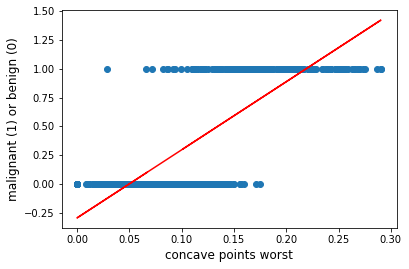

In [39]:
# Linear Regression doesnt work on binary classifcation...
lr = LinearRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)

plt.scatter(can_df['concave points_worst'], can_df['diagnosis'])
plt.plot(X_test['concave points_worst'], predictions, color = 'red')
plt.ylabel('malignant (1) or benign (0)', fontsize = 12)
plt.xlabel('concave points worst', fontsize = 12);

In [40]:
logreg = LogisticRegression(C = 1000) 
scaler = StandardScaler()
logreg_pipe = make_pipeline(scaler, logreg)
logreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(C=1000))])

In [41]:
example = pd.DataFrame(data = {'worst_concave_points': X_test['concave points_worst'], 'diagnosis': y_test})
example['logistic_preds'] = pd.DataFrame(logreg_pipe.predict_proba(X_test)).loc[:,1].values
example = example.sort_values(['logistic_preds'])

example.head()

,worst_concave_points,diagnosis,logistic_preds
538,0.0,0,0.000309
557,0.0,0,0.000309
140,0.0,0,0.000309
101,0.0,0,0.000309
561,0.0,0,0.000309


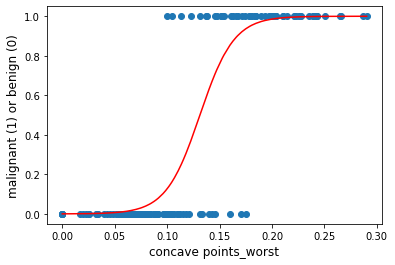

In [42]:
plt.scatter(X_test['concave points_worst'], y_test)
plt.plot(example['worst_concave_points'], example['logistic_preds'].values, color='red')
plt.ylabel('malignant (1) or benign (0)', fontsize = 12)
plt.xlabel('concave points_worst', fontsize = 12);

### Hyperparameter Tuning
Regularization used to reduce overfitting in a model. Introduced information (bias) to penalize extreme parameter (weight) values.
- L1: Introduces a penalty that pushes some/many weights to zero.
- L2: WOrks well when there is multicollinearity. filtering out the noise from the data and preventing overfitting.

- C: in scikit the parameter C is the inverse of alpha. Decreasing C increases the regularization strength. (C = 1/alpha). 

In [43]:
can_df = pd.read_csv(cancer_filepath)
can_df.head()

can_df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [44]:
# Untuned Logistics Regression 
X = can_df.drop(columns = ['diagnosis', 'id', 'Unnamed: 32'])
y = can_df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

scaler = StandardScaler()
logreg = LogisticRegression()

logreg_pipe = make_pipeline(scaler, logreg)
logreg_pipe.fit(X_train, y_train)

#Print initial scores
print(f'Training Score: {logreg_pipe.score(X_train, y_train)}')
print(f'Test Score: {logreg_pipe.score(X_test, y_test)}')

Training Score: 0.9859154929577465
Test Score: 0.9790209790209791


{0.0001: 0.6223776223776224,
 0.001: 0.6223776223776224,
 0.01: 0.951048951048951,
 0.1: 0.972027972027972,
 1: 0.972027972027972,
 10: 0.9440559440559441,
 100: 0.9370629370629371,
 1000: 0.9370629370629371}

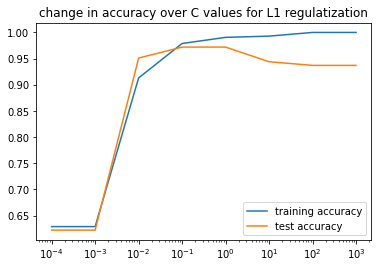

In [45]:
# L1 Tuning
# create a list of c values and empty list for scores
c_values = [.0001, .001, .01, .1, 1, 10, 100, 1000]
train_scores = []
test_scores = []

for c in c_values:
    log_reg = LogisticRegression(C = c, max_iter = 1000, 
                                 solver = 'liblinear', penalty = 'l1')
    log_reg_pipe = make_pipeline(scaler, log_reg)
    log_reg_pipe.fit(X_train, y_train)

    train_scores.append(log_reg_pipe.score(X_train, y_train))
    test_scores.append(log_reg_pipe.score(X_test, y_test))

fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label = 'training accuracy')
ax.plot(c_values, test_scores, label = 'test accuracy')
ax.set_xticks(c_values)
ax.set_title('change in accuracy over C values for L1 regulatization')
ax.legend()

ax.set_xscale('log')

{c:score for c, score in zip(c_values, test_scores)}

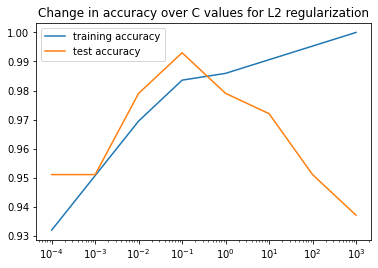

In [46]:
# L2 Tuning
c_values = [.0001, .001, .01, .1, 1, 10, 100, 1000]
train_scores  = []
test_scores = []

for c in c_values:
    log_reg = LogisticRegression(C=c, max_iter=1000,
                                 solver='liblinear', penalty = 'l2')
    log_reg_pipe = make_pipeline(scaler, log_reg)
    log_reg_pipe.fit(X_train, y_train)

    train_scores.append(log_reg_pipe.score(X_train, y_train))
    test_scores.append(log_reg_pipe.score(X_test, y_test))

fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label = 'training accuracy')
ax.plot(c_values, test_scores, label = 'test accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for L2 regularization')
ax.legend()
ax.set_xscale('log');

## ROC Curves
Receiver Operating Characteristics Curve: Is a way to visualize the performance of a model. Plot of the true positive rate (TPR) vs  the false positive rate (FPR).

Area under the ROC Curve (AUC) is a way to quntify how well defined our classes are. The higher the AUC the better the model is doing at defferentiating between classes. 

In [47]:
from sklearn.metrics import roc_auc_score, plot_roc_curve

In [48]:
iris_df = pd.read_csv(iris_filepath)
iris_df['Species'] = iris_df['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 0, 'Iris-virginica': 1})
iris_df.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [49]:
X = iris_df.drop(columns = 'Species')
y = iris_df['Species']
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
# Make an instance of the model
logreg = LogisticRegression(C = .001)
# Scaling logistic regression
scaler = StandardScaler()
# Create pipeline
logreg_pipe = make_pipeline(scaler, logreg)
# Training the model on the data, storing the information learned from the data
# Model is learning the relationship between X and y 
logreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(C=0.001))])

In [50]:
# Calculate AUC for both training and testing sets
print(f'Training AUC: {roc_auc_score(y_train, logreg_pipe.predict_proba(X_train)[:,1])}')
print(f'Testing AUC: {roc_auc_score(y_test, logreg_pipe.predict_proba(X_test)[:,1])}')

Training AUC: 0.9827889005971198
Testing AUC: 0.9696969696969697


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


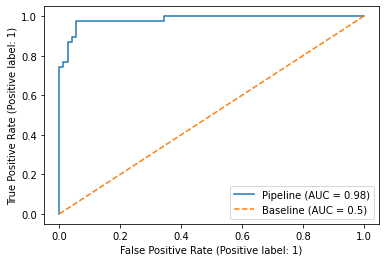

In [51]:
plot_roc_curve(logreg_pipe, X_train, y_train)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend();

## Multiclass Classification w/ Logistic Regression
Logistic Regression is typically meant for only two classes (binary choice) in the target. However it can be used for multiclass analysis using the One verse Rest (OvR) or (Sometimes called One vs All (OvA)) or One vs One (OvO). 
- One Verse Rest: turns multiclass into a binary problem (ex: 1 v 2,3; 2 v 1,3; 3 v 2,1). One run the OvR finds the best fit between these binary problems.
- One Verse One: Turns mutli class into binary by comparing between all within the group (1 v 2, 1 v 3, 2 v 3, etc). Grows exponentially... takes a long time to run/fit.

In [54]:
wine_df = pd.read_csv(wine_filepath)

wine_df.head()

,Class label,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavonid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [55]:
print('Class labels', np.unique(wine_df['Class label']))

Class labels [1 2 3]


In [57]:
wine_df['Class label'].value_counts()

2    71
1    59
3    48
Name: Class label, dtype: int64

In [69]:
y = wine_df.loc[:, 'Class label']
X = wine_df.loc[:, wine_df.columns != 'Class label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    random_state = 0,
                                                    stratify = y)

In [70]:
# Check stratify results
unique, counts = np.unique(y_train, return_counts = True)
dict(zip(unique, counts))

{1: 41, 2: 50, 3: 33}

In [71]:
#now on test
unique, counts = np.unique(y_test, return_counts = True)
dict(zip(unique, counts))

{1: 18, 2: 21, 3: 15}

In [73]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [78]:
log_reg = LogisticRegression(penalty = 'l1',
                             #c = 1.0,
                             solver = 'liblinear',
                             multi_class = 'ovr')

log_reg.fit(X_train, y_train)
print('Training Accuracy:', log_reg.score(X_train, y_train))
print('Test Accuracy:', log_reg.score(X_test, y_test))

Training Accuracy: 1.0
Test Accuracy: 1.0


In [79]:
# Three intercepts 1 v2,3; etc
log_reg.intercept_

array([-1.26345965, -1.21585931, -2.37064775])

In [81]:
# Same
log_reg.coef_

array([[ 1.24593342,  0.18077867,  0.7436112 , -1.16127074,  0.        ,
         0.        ,  1.16982579,  0.        ,  0.        ,  0.        ,
         0.        ,  0.54726402,  2.5104296 ],
       [-1.53842418, -0.38640645, -0.99475394,  0.36375407, -0.05933511,
         0.        ,  0.66721548,  0.        ,  0.        , -1.93271788,
         1.23691175,  0.        , -2.23360883],
       [ 0.13583929,  0.16841124,  0.3573274 ,  0.        ,  0.        ,
         0.        , -2.43774871,  0.        ,  0.        ,  1.56343603,
        -0.81881015, -0.4927569 ,  0.        ]])

In [83]:
log_reg.predict_proba(X_test[0:1])

array([[9.76612260e-01, 4.47773121e-04, 2.29399670e-02]])